### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Lendo o dataset

In [2]:
fert = pd.read_csv('Fertilizer Prediction.csv')
fert.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


### Processando os dados

In [ ]:
fert.shape

In [ ]:
fert.describe()

In [ ]:
fert.dtypes

In [ ]:
fert['Soil Type'].unique()

In [ ]:
fert['Crop Type'].unique()

In [ ]:
fert['Fertilizer Name'].unique()

In [ ]:
fert.isna()

### Analisando o dataset

<Axes: xlabel='Fertilizer Name', ylabel='count'>

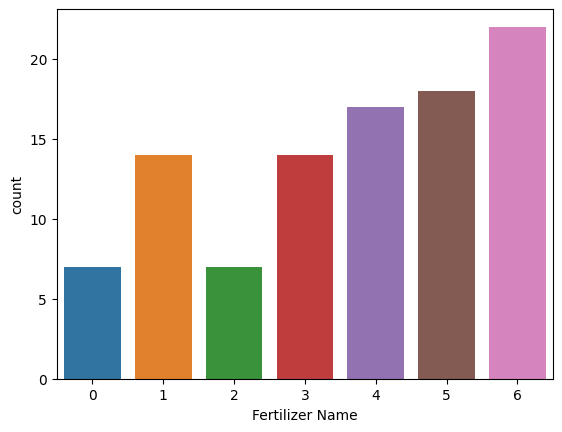

In [29]:
sns.countplot(x='Fertilizer Name', data = fert)

In [ ]:
sns.countplot(x='Soil Type', data = fert)

<Axes: xlabel='Crop Type', ylabel='count'>

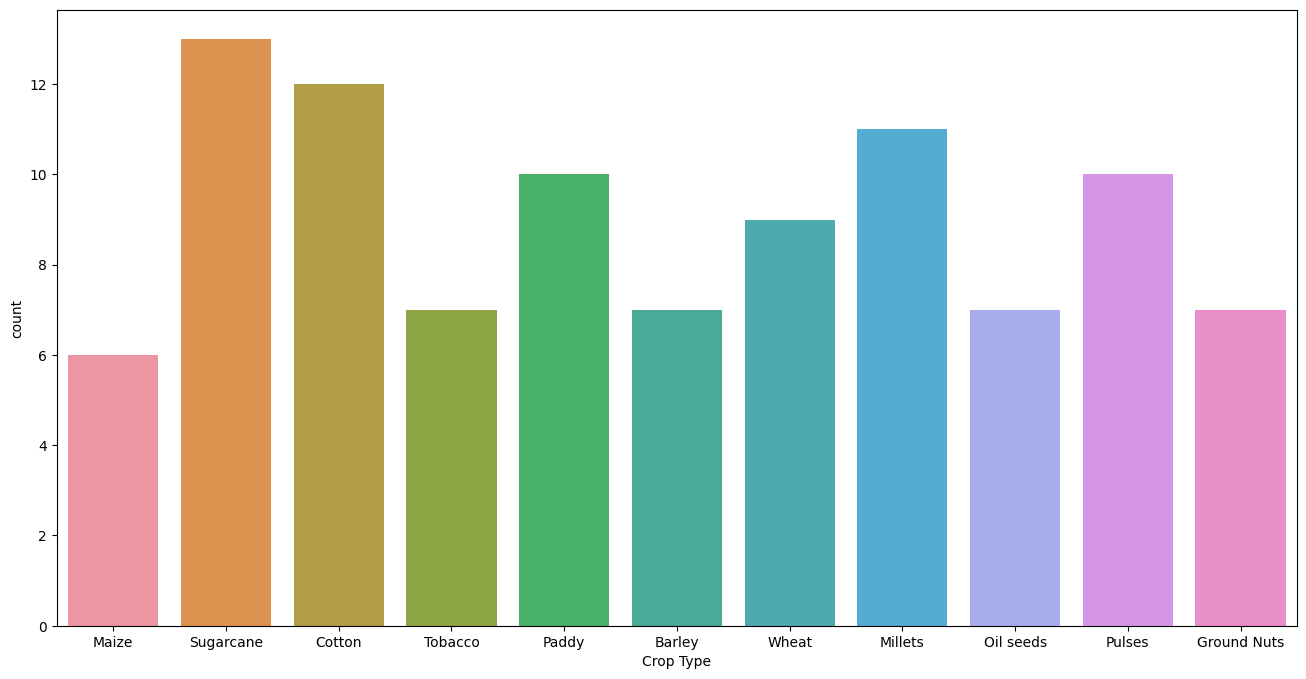

In [3]:
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = fert)

* Contagem equilibrada de Crop Type e Soil Type, porém o Fertilizer Name é mais desequilibrado

<Axes: xlabel='Fertilizer Name', ylabel='Temparature'>

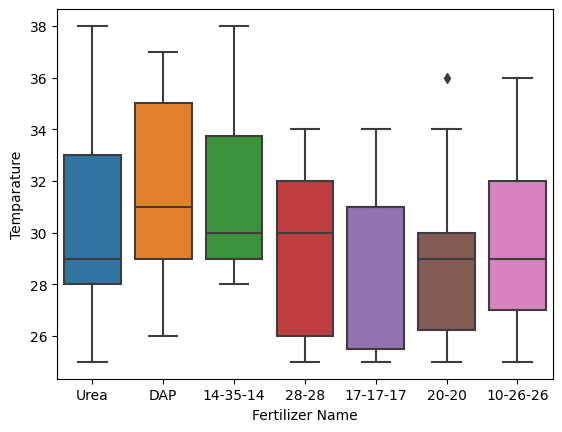

In [4]:
sns.boxplot(y = fert['Temparature'], x = fert['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Humidity '>

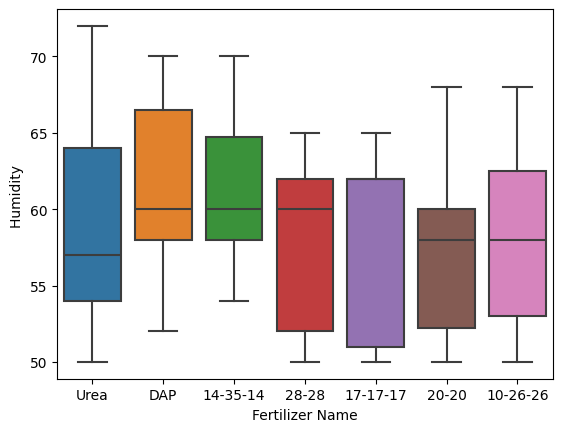

In [5]:
sns.boxplot(y = fert['Humidity '], x = fert['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Moisture'>

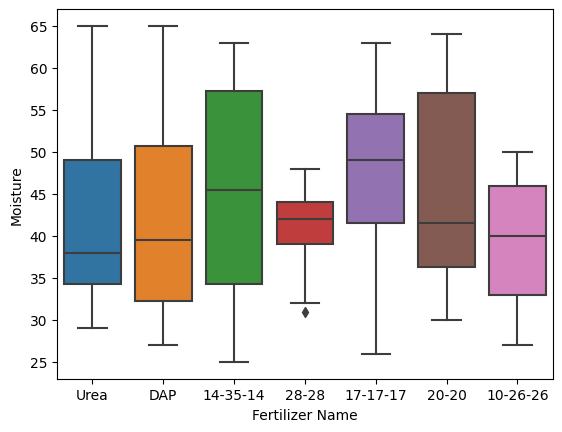

In [17]:
sns.boxplot(y = fert['Moisture'], x = fert['Fertilizer Name'])

* Identifiquei um dado muito fora do comum na coluna 28-28

In [9]:
outlier_row = fert[(fert['Fertilizer Name'] == '28-28') & (fert['Moisture'] == 64)]

outlier_row

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name


* Analisando, se trata de um dado onde alguns parâmetros estão fora do comum para este tipo de fertilizante, então o mais viável é substituir estes valores para não interferir no aprendizado do modelo

In [15]:
mean_value = fert['Moisture'].mean().round()
fert.at[62, 'Moisture'] = mean_value

mean_value = fert['Humidity '].mean().round()
fert.at[62, 'Humidity '] = mean_value

fert.loc[62]

Temparature            34
Humidity               59
Moisture             43.0
Soil Type           Black
Crop Type          Cotton
Nitrogen               24
Potassium               0
Phosphorous            20
Fertilizer Name     28-28
Name: 62, dtype: object

* Os valores de Humidity e Moisture foram substituidos por valores que condizem mais com o tipo de fertilizante

<Axes: xlabel='Fertilizer Name', ylabel='Moisture'>

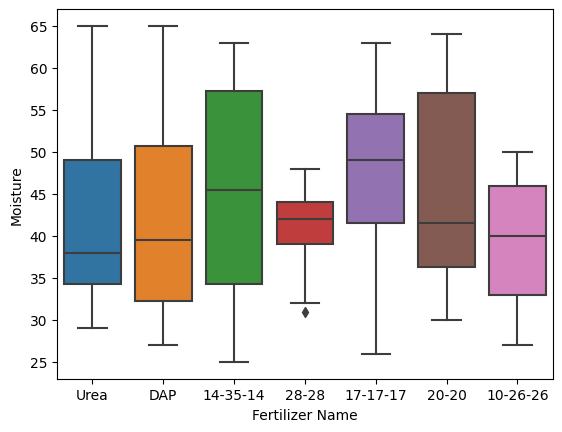

In [18]:
sns.boxplot(y = fert['Moisture'], x = fert['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Potassium'>

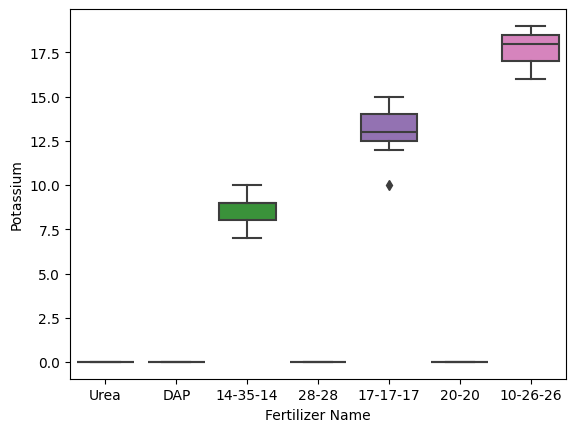

In [19]:
sns.boxplot(y = fert['Potassium'], x = fert['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Nitrogen'>

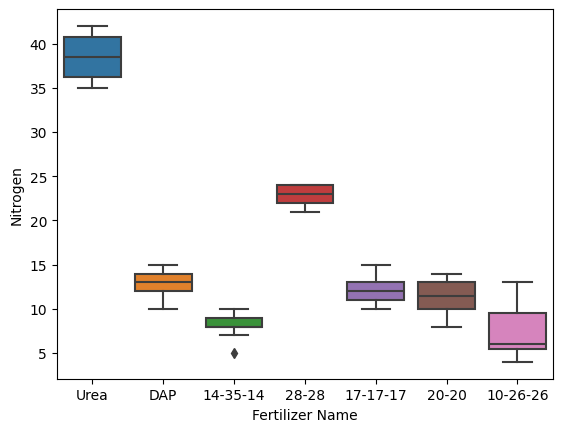

In [20]:
sns.boxplot(y = fert['Nitrogen'], x = fert['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Phosphorous'>

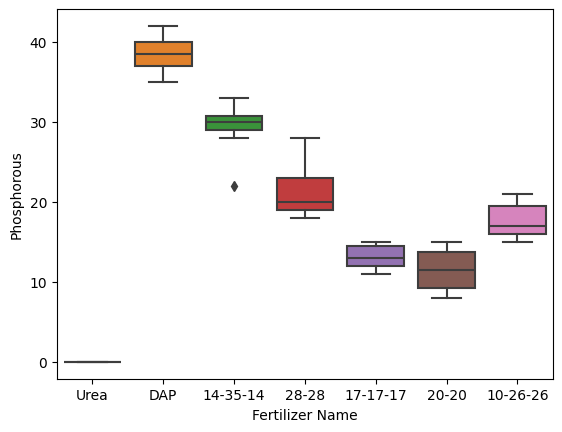

In [21]:
sns.boxplot(y = fert['Phosphorous'], x = fert['Fertilizer Name'])

* Existem outros valores outliers, porém não são de uma descrepância tão grande, então não é recomendado retira-los

### Escolhendo Features e Label Encoder

In [22]:
from sklearn.preprocessing import LabelEncoder

soil_encoder = LabelEncoder()
fert['Soil Type'] = soil_encoder.fit_transform(fert['Soil Type'])

fert['Soil Type'].unique()

array([4, 2, 0, 3, 1])

In [23]:
crop_encoder = LabelEncoder()
fert['Crop Type'] = crop_encoder.fit_transform(fert['Crop Type'])

fert['Crop Type'].unique()

array([ 3,  8,  1,  9,  6,  0, 10,  4,  5,  7,  2])

In [24]:
fertilizer_encoder = LabelEncoder()
fert['Fertilizer Name'] = fertilizer_encoder.fit_transform(fert['Fertilizer Name'])

fert['Fertilizer Name'].unique()

array([6, 5, 1, 4, 2, 3, 0])

In [25]:
features = fert[['Temparature','Humidity ','Moisture','Soil Type','Crop Type','Nitrogen','Potassium','Phosphorous']]
target = fert['Fertilizer Name']

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(fert.drop('Fertilizer Name',axis=1),fert['Fertilizer Name'],test_size=0.3,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (69, 8), y_train = (69,), x_test = (30, 8), y_test = (30,)


In [27]:
acc = []
model = []

### Modelos de aloritmos de classificação

- KNeighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN precisão: ", x)

print(classification_report(y_test,predicted_values))

KNN precisão:  0.8666666666666667
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       1.00      1.00      1.00         5
           2       0.33      0.33      0.33         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         7

    accuracy                           0.87        30
   macro avg       0.81      0.81      0.81        30
weighted avg       0.87      0.87      0.87        30



In [80]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation: ',score)

Cross validation:  [0.95       0.85       0.95       0.85       0.73684211]


In [33]:
# Precisão do treino
knn_train_accuracy = knn.score(x_train,y_train)
print("Precisão do treino:",knn.score(x_train,y_train))
# Precisão do teste
knn_test_accuracy = knn.score(x_test,y_test)
print("Precisão do teste:",knn.score(x_test,y_test))

Precisão do treino: 0.9855072463768116
Precisão do teste: 0.8666666666666667


In [ ]:
import pickle
pickle_out = open('classifier_fert.pkl','wb')
pickle.dump(knn,pickle_out)
pickle_out.close()

### Hiper-parâmetros para o KNN

In [34]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [94]:
best_model = g_res.best_estimator_

y_pred = best_model.predict(x_test)

# Calcule e imprima o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.83      1.00      0.91         5
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         7

    accuracy                           0.93        30
   macro avg       0.94      0.90      0.90        30
weighted avg       0.95      0.93      0.92        30



In [35]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [36]:
g_res.best_score_

0.927536231884058

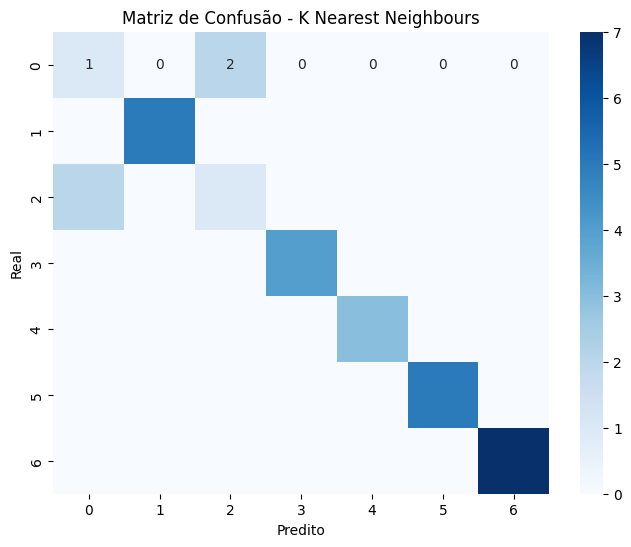

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_values)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - K Nearest Neighbours')
plt.show()

In [46]:
import pickle
pickle_out = open('classifier_fert.pkl','wb')
pickle.dump(gs,pickle_out)
pickle_out.close()

TypeError: BufferedWriter.close() takes no arguments (2 given)

### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree precisão: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree precisão:  83.33333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.62      1.00      0.77         5
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         7

    accuracy                           0.83        30
   macro avg       0.80      0.76      0.75        30
weighted avg       0.84      0.83      0.81        30



In [82]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.95 1.   0.95 0.95 1.  ]


In [83]:
#Treino
dt_train_accuracy = DT.score(x_train,y_train)
print("Precisão do treino:",DT.score(x_train,y_train))
#Teste
dt_test_accuracy = DT.score(x_test,y_test)
print("Precisão do teste:",DT.score(x_test,y_test))

Precisão do treino: 1.0
Precisão do teste: 0.8333333333333334


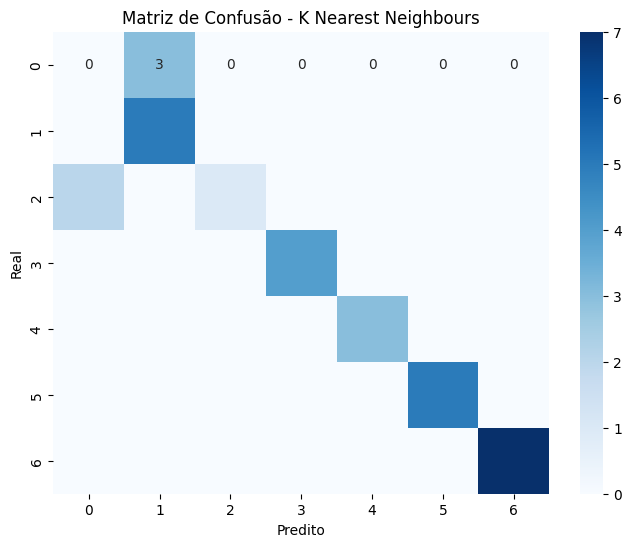

In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_values)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - K Nearest Neighbours')
plt.show()

### Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest precisão: ", x)

print(classification_report(y_test,predicted_values))

Random Forest precisão:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.71      1.00      0.83         5
           2       0.50      0.33      0.40         3
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         7

    accuracy                           0.83        30
   macro avg       0.72      0.76      0.73        30
weighted avg       0.78      0.83      0.80        30



In [86]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation: ',score)

Cross validation:  [1.  1.  1.  0.9 1. ]


In [87]:
#Treino
rf_train_accuracy = RF.score(x_train,y_train)
print("Precisão do treino:",RF.score(x_train,y_train))
#Teste
rf_test_accuracy = RF.score(x_test,y_test)
print("Precisão do teste:",RF.score(x_test,y_test))

Precisão do treino: 1.0
Precisão do teste: 0.8333333333333334


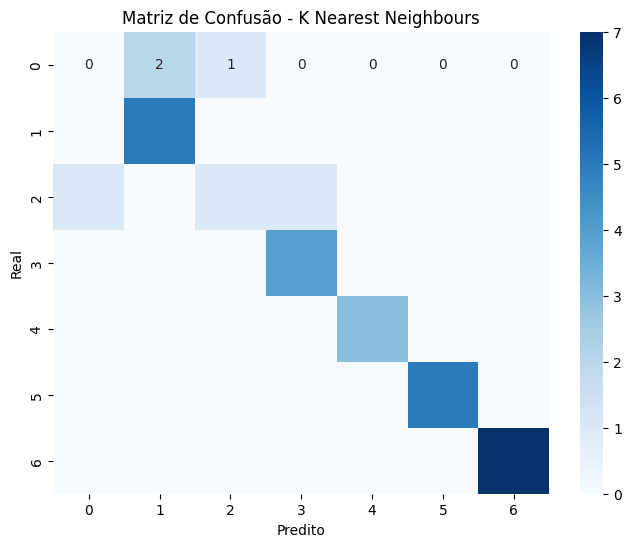

In [88]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_values)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - K Nearest Neighbours')
plt.show()

### GridSearchCV com Random Forest

In [89]:
from sklearn.model_selection import GridSearchCV


grid_params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

gs = GridSearchCV(RandomForestClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [93]:
best_model = g_res.best_estimator_

y_pred = best_model.predict(x_test)

# Calcule e imprima o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.83      1.00      0.91         5
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         7

    accuracy                           0.93        30
   macro avg       0.94      0.90      0.90        30
weighted avg       0.95      0.93      0.92        30



In [90]:
g_res.best_params_

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}

In [91]:
g_res.best_score_

0.9855072463768115

### Navis Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes precisao: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes precisao:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [96]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation: ',score)

Cross validation:  [1. 1. 1. 1. 1.]


In [97]:
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Precisão do treino:",NaiveBayes.score(x_train,y_train))
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Precisão do teste:",NaiveBayes.score(x_test,y_test))

Precisão do treino: 1.0
Precisão do teste: 1.0


### XGBoost

In [98]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)

predicted_values = XB.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('XGBoost')
print("XGBoost precisão: ", x)

print(classification_report(y_test,predicted_values))

XGBoost precisão:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         7

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.96        30



In [99]:
score = cross_val_score(XB,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.95 1.   0.95 1.   1.  ]


In [100]:
XB_train_accuracy = XB.score(x_train,y_train)
print("Precisão do treino:",XB.score(x_train,y_train))

XB_test_accuracy = XB.score(x_test,y_test)
print("Precisão do teste:",XB.score(x_test,y_test))

Precisão do treino: 1.0
Precisão do teste: 0.9666666666666667


### Comparação entre os modelos

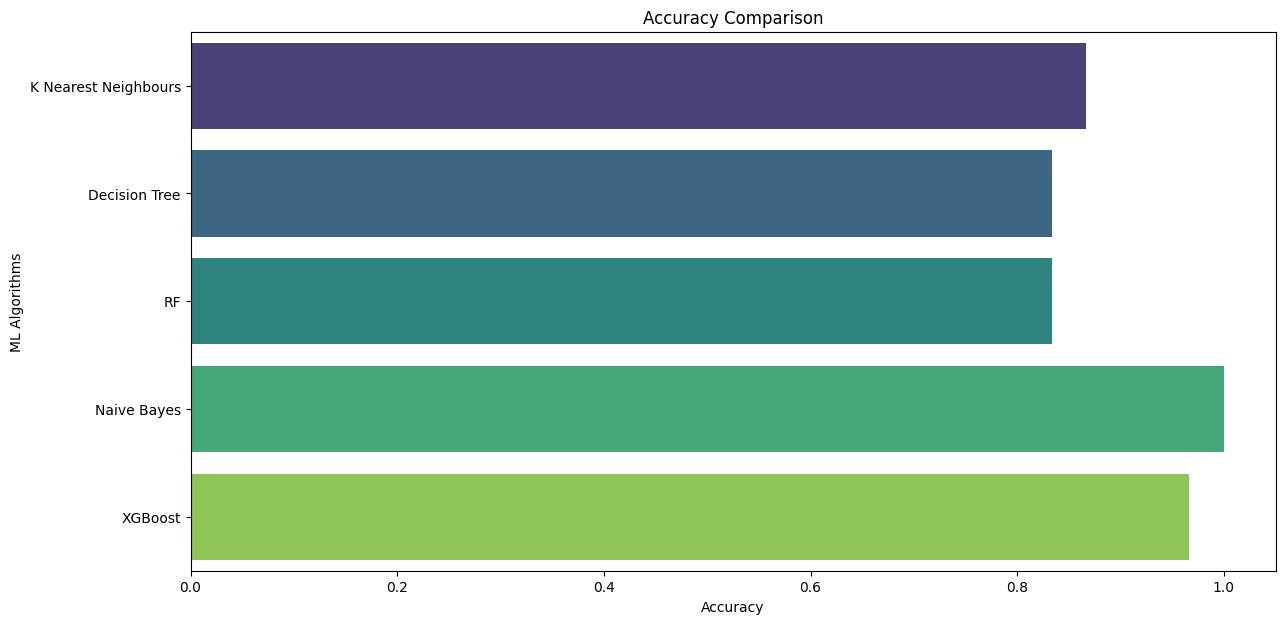

In [101]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

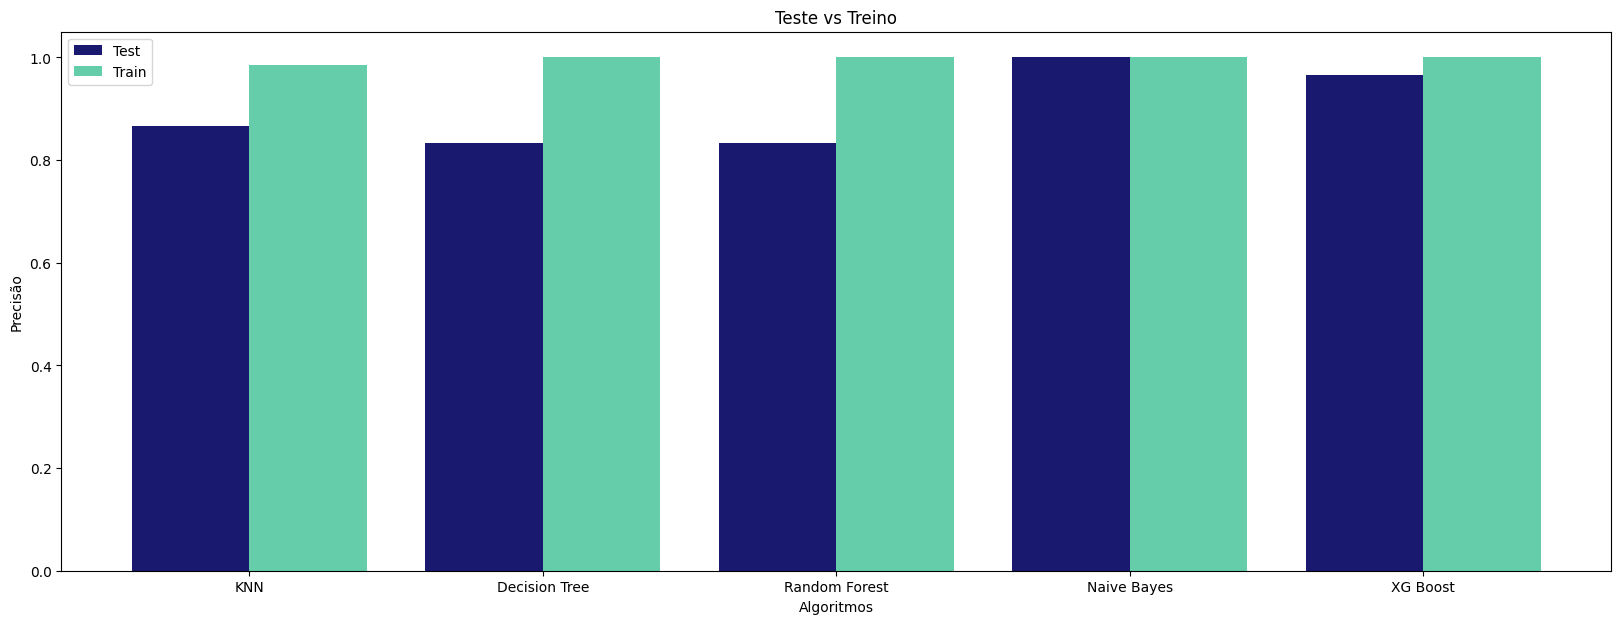

In [102]:
label = ['KNN', 'Decision Tree','Random Forest','Naive Bayes','XG Boost']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy, XB_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy, XB_train_accuracy]

f, ax = plt.subplots(figsize=(20,7))
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("Algoritmos")
plt.ylabel("Precisão")
plt.title("Teste vs Treino")
plt.legend()
plt.show()

Analisando os gráficos fica fácil de perceber que o Naive Bayes foi o que teve a melhor precisão <br>
Porém, quando um algoritmo atinge 100% de precisão, é necessário desconfiar <br>
Pois é incomum e pode significar algum erro ou falta de dados para comparação <br>